## Sentiment Analysis on Restaurant Reviews 

#### Importing Necessary Libraries.

In [4]:
import numpy as np
import pandas as pd

### Exploratory Data Analysis (EDA)

#### Data Loading

In [7]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)

#### Descriptive Data Analysis

In [9]:
df.shape

(1000, 2)

In [10]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [11]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [13]:
df.sample(5)

,Review,Liked
778,My girlfriend's veal was very bad.,0
69,A great way to finish a great.,1
273,Stopped by this place while in Madison for the...,1
375,Best tacos in town by far!!,1
836,Just had lunch here and had a great experience.,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [163]:
df['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

In [161]:
df.describe()

,Liked,Length
count,1000.00000,1000.000000
mean,0.50000,58.315000
std,0.50025,32.360052
min,0.00000,11.000000
25%,0.00000,33.000000
50%,0.50000,51.000000
75%,1.00000,80.000000
max,1.00000,149.000000


In [17]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [18]:
df.duplicated().sum()

4




### Feature Engineering


In [165]:
df['Length'] = df['Review'].apply(len)
df.head(5)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


### Data Preprocessing

#### Importing Essential NLP Libraries

In [178]:
import nltk
import re

# Download stopwords
nltk.download('stopwords')

# Import stopwords and PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [180]:
print(list(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [222]:
# Initialize an empty list to store the clean reviews
corpus = []

# Initialize the PorterStemmer
ps = PorterStemmer()

# Loop through the first 1000 reviews
for i in range(0, 1000):
    # Step 1: Removing non-alphabetical characters
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])
    
    # Step 2: Converting text to lowercase
    review = review.lower()
        
    # Step 3: Tokenization
    review_words = review.split()
    
    # Step 4: Removing stopwords
    review_words = [word for word in review_words if word not in set(stopwords.words('english'))]
    
    # Step 5: Stemming
    review_words = [ps.stem(word) for word in review_words]
        
    # Step 6: Rejoining Tokens
    review = ' '.join(review_words)
    
    # Step 7: Appending to the Corpus
    corpus.append(review)



In [223]:
corpus[:20]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like']

## Word Cloud

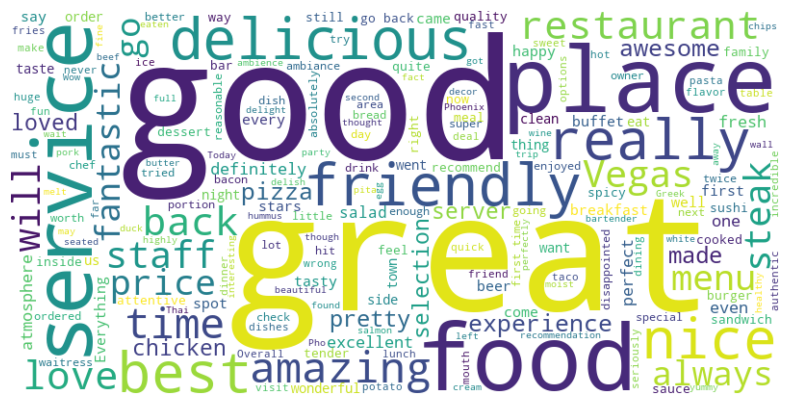

In [226]:
# importing library
# positive review
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked']==1,:]
text=''.join([text for text in word_cloud['Review']])
#Generating a WordCloud object
wordcloud = WordCloud (width=800, height=400, background_color='white').generate(text)
#Displaying the wordcloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [228]:
# Creating a Bag of Words Model (BoW) from the corpus of cleaned tex review
from sklearn.feature_extraction.text import CountVectorizer

# Initializing a CountVectorizer with a specified maximum number of features (max_features)
cv = CountVectorizer(max_features=1500)

# Applying the CountVectorizer to the corpus to transform the text data into a numerical representation
X = cv.fit_transform(corpus).toarray()

#Extracting the target variable 'y' from the DataFrame 'df' containing target values
y = df.iloc[:, 1].values





### Data Splitting

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [233]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))




### Model Training

In [235]:
#Create a Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [237]:
from sklearn.metrics import accuracy_score
# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_test_pred = model.predict(X_test)

# Calculating the testingb accuracy for the fold
test_accuracy = accuracy_score(y_test, y_test_pred)

In [239]:
# Print the testing accuracy
print(f'MultinomialNB: Testing Accuracy= {test_accuracy * 100:2f}%')

MultinomialNB: Testing Accuracy= 76.500000%


In [241]:
# Printing the tests set results

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [245]:
from sklearn.metrics import accuracy_score , precision_score, recall_score, f1_score, confusion_matrix, classification_report
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[72 25]
 [22 81]]


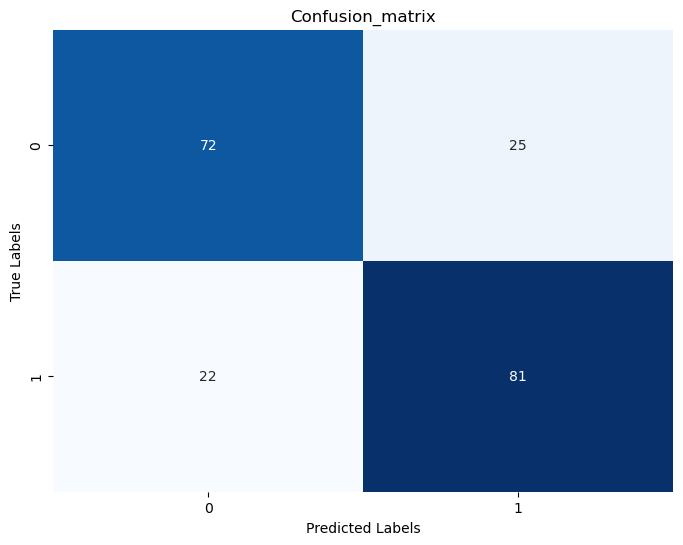

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion_matrix")
plt.show()


In [267]:
from sklearn.metrics import classification_report
classification = classification_report(y_test,y_test_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        97
           1       0.76      0.79      0.78       103

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200



### Predictions

In [273]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
def predict_sentiment(sample_review, model, cv):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review )
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if word not in set(stopwords.words('english'))]
    ps=PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    
    temp = cv.transform([final_review]).toarray()
    sentiment = model.predict(temp)
    return sentiment[0]

In [288]:
# Assuming you have a trained NLP model named "model" and a CountVectorizer named "cv"
sample_text = "The food is really good and delicious"
predicted_sentiment = predict_sentiment(sample_text, model, cv)
print(f'Predicted Sentiment: {predicted_sentiment}')

Predicted Sentiment: 1


In [290]:
sample_text = "The food is tasteless and bad"
predicted_sentiment = predict_sentiment(sample_text, model, cv)
print(f'Predicted Sentiment: {predicted_sentiment}')

Predicted Sentiment: 0
